In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv',header=None)

In [4]:
df.head()

,0
0,0.467053
1,-1.066558
2,1.946904
3,-0.956927
4,-1.556807


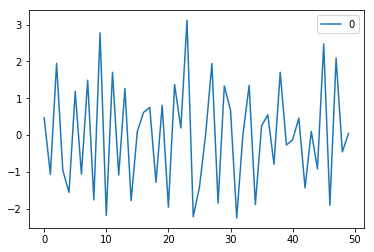

In [5]:
df[:50].plot()
plt.show()

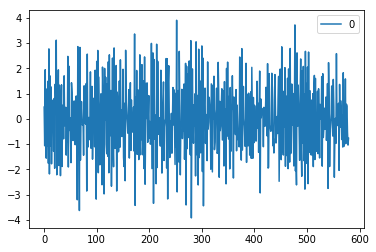

In [6]:
df.plot()
plt.show()

In [7]:
cut = 550
end = len(df)

In [8]:
X=df.as_matrix().squeeze()[:cut]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
Y=df.as_matrix().squeeze()[cut:]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


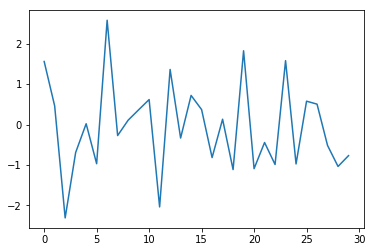

In [10]:
plt.plot(Y)

# 傅里叶变换

D:\anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


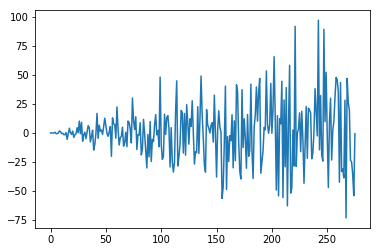

In [15]:
plt.plot(np.fft.rfft(X))

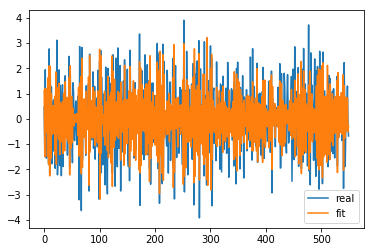

In [40]:
plt.plot(X,label='real')
freq = np.fft.rfft(X)
freq[:-100] = 0.0
plt.plot(np.tile(np.fft.irfft(freq),1), label='fit')
plt.legend()
plt.show()

保留低频率

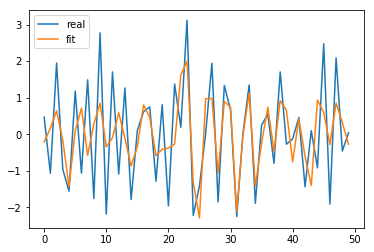

In [192]:
plt.plot(X[:50],label='real')
freq = np.fft.rfft(X)
freq[200:] = 0.0
plt.plot(np.fft.irfft(freq)[:50], label='fit')
plt.legend()
plt.show()

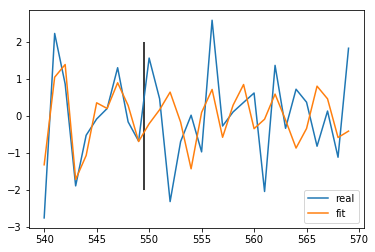

In [193]:
sim_len = 20
idx = np.arange(cut-10,cut+sim_len)

plt.plot(idx,np.r_[X,Y][cut-10:cut+sim_len],label='real')
freq = np.fft.rfft(X)
freq[200:] = 0.0
plt.plot(idx,np.tile(np.fft.irfft(freq),2)[cut-10:cut+sim_len], label='fit')
plt.vlines(cut-0.5,-2,2)
plt.legend()
plt.show()

保留高频率

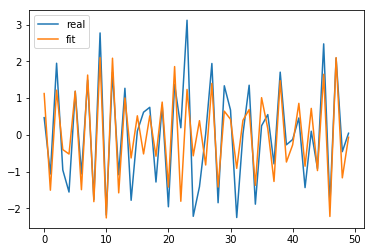

In [34]:
plt.plot(X[:50],label='real')
freq = np.fft.rfft(X)
freq[:-100] = 0.0
plt.plot(np.fft.irfft(freq)[:50], label='fit')
plt.legend()
plt.show()

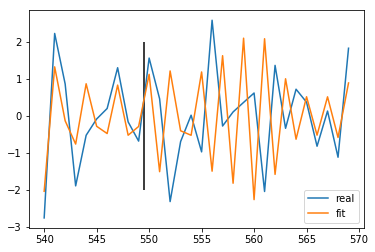

In [55]:
sim_len = 20
idx = np.arange(cut-10,cut+sim_len)

plt.plot(idx,np.r_[X,Y][cut-10:cut+sim_len],label='real')
freq = np.fft.rfft(X)
freq[:-100] = 0.0
plt.plot(idx,np.tile(np.fft.irfft(freq),2)[cut-10:cut+sim_len], label='fit')
plt.vlines(cut-0.5,-2,2)
plt.legend()
plt.show()

# 神经网络

In [145]:
lag = 10

exog = []
endog = []
for i in range(X.shape[0]-lag-1):
    exog.append(X[i:i+lag])
    endog.append(X[i+lag])
exog = np.array(exog)
endog = np.array(endog)

In [146]:
import sklearn.neural_network

In [169]:
net = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(15, 15),max_iter=1000)

In [170]:
net.fit(exog,endog)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

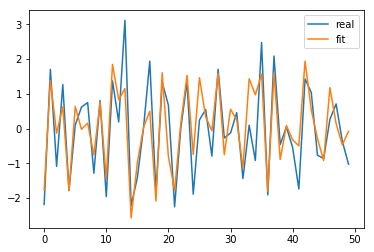

In [179]:
plt.plot(X[10:60],label='real')
plt.plot(net.predict(exog)[:50],label='fit')
plt.legend()
plt.show()

In [172]:
def cascade_predict(base, k):
    res = []
    for i in range(k):
        y = net.predict(np.array([base]))[0]
        res.append(y)
        base = np.r_[base[1:],y]
    return res

big_exog = []
XY = np.r_[X,Y]
for i in range(XY.shape[0]-lag-1):
    big_exog.append(XY[i:i+lag])
big_exog = np.array(big_exog)

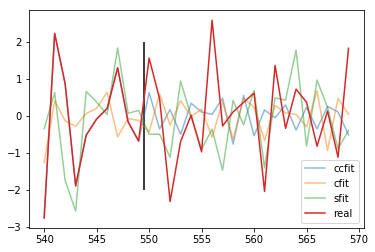

In [178]:
sim_len = 20
idx = np.arange(cut-10,cut+sim_len)

plt.plot(idx, np.r_[X[-10:],cascade_predict(X[-10:],20)], label='ccfit',alpha=0.5)
plt.plot(idx, cascade_predict(X[-20:-10],30), label='cfit', alpha=0.5)
plt.plot(idx, net.predict(big_exog)[cut-10-1:cut+sim_len],label='sfit',alpha=0.5)
plt.plot(idx, np.r_[X[-10:],Y[:sim_len]], label='real')
plt.vlines(cut-0.5,-2,2)
plt.legend()
plt.show()